In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
palatte = {
    'IBD': "brown",
    'qCD+S': '#c63735',
    'aCD': '#df7b26',
    'qCD-S': '#1a71b8',
    "HC": '#51a246',
    "Healthy": '#51a246',
    'IBS-D': "#9f5590",
    'IBS': "#9f5590",
}
PRO_CG = {
    "Low-PRO": 'qCD-S',
    'High-PRO': 'qCD+S',
    "Active CD": 'aCD',
}

In [4]:
psc = pd.read_csv('data/FigS01_PSC.csv')
psc.head()

,specimen,cohort,raw_linecount,raw_readcount,qc_linecount,qc_readcount,PRO_GRP,Clinical Group,f_qc,human_readcount
0,5140-AL-4,IBS,426927056,106731764.0,273311008,68327752.0,NaN,IBS-D,0.640182,38404012
1,5140-AL-7,IBS,383935928,95983982.0,287351180,71837795.0,NaN,IBS-D,0.748435,24146187
2,5140-AL-17,IBS,346869676,86717419.0,175266544,43816636.0,NaN,IBS-D,0.505281,42900783
3,5140-AL-30,IBS,381937544,95484386.0,289741720,72435430.0,NaN,IBS-D,0.758610,23048956
4,5140-AL-27,IBS,400060604,100015151.0,297939208,74484802.0,NaN,IBS-D,0.744735,25530349


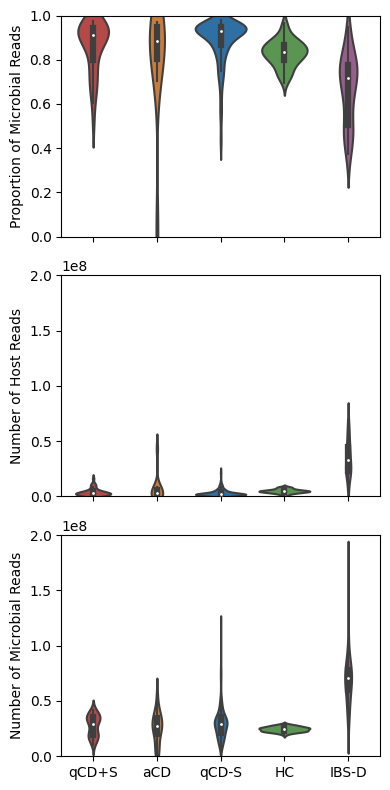

In [5]:
fig, axes = plt.subplots(
    nrows=3,
    figsize=(4,8),
    sharex=True
)

sns.violinplot(
    data=psc,
    x='Clinical Group',
    y='f_qc',
    order=[
        'qCD+S',
        'aCD',
        'qCD-S',
        'HC',
        'IBS-D',
    ],
    palette=palatte,
    ax=axes[0],
)
axes[0].set_ylabel("Proportion of Microbial Reads")
axes[0].set_xlabel(None)
axes[0].set_ylim([0,1])
#--
sns.violinplot(
    data=psc,
    x='Clinical Group',
    y='human_readcount',
    order=[
        'qCD+S',
        'aCD',
        'qCD-S',
        'HC',
        'IBS-D',
    ],
    palette=palatte,
    ax=axes[1],
)
axes[1].set_ylabel('Number of Host Reads')
axes[1].set_xlabel(None)
axes[1].set_ylim([0, 2e8])
#--
sns.violinplot(
    data=psc,
    x='Clinical Group',
    y='qc_readcount',
    order=[
        'qCD+S',
        'aCD',
        'qCD-S',
        'HC',
        'IBS-D',
    ],
    palette=palatte,
    ax=axes[2],
)
axes[2].set_ylabel('Number of Microbial Reads')
axes[2].set_xlabel(None)
axes[2].set_ylim([0, 2e8])
plt.tight_layout()
plt.show()